# Flood Predection Using Various Kind of Machine Learning Models

In [1]:
import pandas as pd

# Load dataset

In [163]:
data = pd.read_csv('floodpredicton.csv')

# Pre Processing

In [164]:
print(data)

          Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0          0       Barisal  1949      1      29.4      12.3       0.0   
1          1       Barisal  1949      2      33.9      15.2       9.0   
2          2       Barisal  1949      3      36.7      20.2       8.0   
3          3       Barisal  1949      4      33.9      23.9     140.0   
4          4       Barisal  1949      5      35.6      25.0     217.0   
...      ...           ...   ...    ...       ...       ...       ...   
20539  20539        Teknaf  2013      8      32.5      25.4     851.0   
20540  20540        Teknaf  2013      9      32.6      25.7     329.0   
20541  20541        Teknaf  2013     10      33.1      24.8     271.0   
20542  20542        Teknaf  2013     11      32.5      20.0       0.0   
20543  20543        Teknaf  2013     12      29.9      16.5       0.0   

       Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0                   68.0    0.453704             0

In [165]:
data.head()

Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0   0       Barisal  1949      1      29.4      12.3       0.0   
1   1       Barisal  1949      2      33.9      15.2       9.0   
2   2       Barisal  1949      3      36.7      20.2       8.0   
3   3       Barisal  1949      4      33.9      23.9     140.0   
4   4       Barisal  1949      5      35.6      25.0     217.0   

   Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0               68.0    0.453704             0.6         7.831915   
1               63.0    0.659259             0.9         8.314894   
2               59.0    1.085185             1.5         8.131915   
3               71.0    1.772222             3.9         8.219149   
4               76.0    1.703704             4.1         7.046809   

   Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
0           41950  536809.8  510151.9      22.7      90.36    4  1949.01   
1           41950  536809.8  510151.9      22.7      90.36    4  1949.02   
2           41950  536809.8  510151.9      22.7      90.36    4  1949.03   
3           41950  536809.8  510151.9      22.7      90.36    4  1949.04   
4           41950  536809.8  510151.9      22.7      90.36    4  1949.05   

   Flood?  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [166]:
data.tail()

Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
20539  20539        Teknaf  2013      8      32.5      25.4     851.0   
20540  20540        Teknaf  2013      9      32.6      25.7     329.0   
20541  20541        Teknaf  2013     10      33.1      24.8     271.0   
20542  20542        Teknaf  2013     11      32.5      20.0       0.0   
20543  20543        Teknaf  2013     12      29.9      16.5       0.0   

       Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
20539               88.0         2.5             6.2              3.8   
20540               88.0         3.0             6.1              4.2   
20541               85.0         2.5             4.4              5.6   
20542               79.0         2.1             1.7              8.4   
20543               72.0         3.0             0.9              8.1   

       Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
20539           41998  734765.4  308914.1     20.87      92.26    4  2013.08   
20540           41998  734765.4  308914.1     20.87      92.26    4  2013.09   
20541           41998  734765.4  308914.1     20.87      92.26    4  2013.10   
20542           41998  734765.4  308914.1     20.87      92.26    4  2013.11   
20543           41998  734765.4  308914.1     20.87      92.26    4  2013.12   

       Flood?  
20539     1.0  
20540     NaN  
20541     NaN  
20542     NaN  
20543     NaN

In [167]:
data.isnull().sum() 

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

In [168]:
data['Flood?'] = data['Flood?'].fillna(data['Flood?'].mean())

In [169]:
print(data.shape)

(20544, 19)


In [170]:
data.describe()

Sl          Year         Month      Max_Temp      Min_Temp  \
count  20544.000000  20544.000000  20544.000000  20544.000000  20544.000000   
mean   10271.500000   1985.332944      6.500000     33.450739     21.166872   
std     5930.686301     17.610799      3.452137      2.956401      4.949587   
min        0.000000   1948.000000      1.000000     21.600000      6.200000   
25%     5135.750000   1972.000000      3.750000     31.700000     16.900000   
50%    10271.500000   1987.000000      6.500000     33.900000     23.400000   
75%    15407.250000   2000.000000      9.250000     35.400000     25.400000   
max    20543.000000   2013.000000     12.000000     44.000000     28.100000   

           Rainfall  Relative_Humidity    Wind_Speed  Cloud_Coverage  \
count  20544.000000       20544.000000  20544.000000    20544.000000   
mean     198.776621          79.497375      1.415049        3.485827   
std      240.693197           7.667925      1.042454        2.083791   
min        0.000000          34.000000      0.000000        0.000000   
25%        8.000000          75.000000      0.700000        1.600000   
50%      111.000000          81.000000      1.200000        3.300000   
75%      312.000000          85.000000      1.900000        5.500000   
max     2072.000000          97.000000     11.200000        7.900000   

       Bright_Sunshine  Station_Number          X_COR          Y_COR  \
count     20544.000000    20544.000000   20544.000000   20544.000000   
mean          6.419056    41935.098131  549703.189176  579280.955958   
std           1.747959       36.516932  116032.076255  130616.053201   
min           0.000000    41859.000000       0.000000       0.000000   
25%           4.965517    41909.000000  435303.700000  504500.300000   
50%           6.800000    41941.000000  540098.600000  561770.300000   
75%           7.800000    41963.000000  650012.100000  687095.900000   
max          11.000000    41998.000000  734765.400000  844822.300000   

           LATITUDE     LONGITUDE           ALT        Period        Flood?  
count  20544.000000  20544.000000  20544.000000  20544.000000  20544.000000  
mean      23.326647     90.493193     13.357477   1985.397944      0.919653  
std        1.155241      1.108720     13.529530     17.610832      0.127126  
min       20.870000     88.560000      0.000000   1948.010000      0.000000  
25%       22.640000     89.550000      4.000000   1972.050000      0.919653  
50%       23.170000     90.410000      7.000000   1987.040000      0.919653  
75%       24.290000     91.460000     19.000000   2000.092500      0.919653  
max       25.720000     92.260000     63.000000   2013.120000      1.000000

In [171]:
data.info

<bound method DataFrame.info of           Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0          0       Barisal  1949      1      29.4      12.3       0.0   
1          1       Barisal  1949      2      33.9      15.2       9.0   
2          2       Barisal  1949      3      36.7      20.2       8.0   
3          3       Barisal  1949      4      33.9      23.9     140.0   
4          4       Barisal  1949      5      35.6      25.0     217.0   
...      ...           ...   ...    ...       ...       ...       ...   
20539  20539        Teknaf  2013      8      32.5      25.4     851.0   
20540  20540        Teknaf  2013      9      32.6      25.7     329.0   
20541  20541        Teknaf  2013     10      33.1      24.8     271.0   
20542  20542        Teknaf  2013     11      32.5      20.0       0.0   
20543  20543        Teknaf  2013     12      29.9      16.5       0.0   

       Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0                 

In [172]:
data.dtypes

Sl                     int64
Station_Names         object
Year                   int64
Month                  int64
Max_Temp             float64
Min_Temp             float64
Rainfall             float64
Relative_Humidity    float64
Wind_Speed           float64
Cloud_Coverage       float64
Bright_Sunshine      float64
Station_Number         int64
X_COR                float64
Y_COR                float64
LATITUDE             float64
LONGITUDE            float64
ALT                    int64
Period               float64
Flood?               float64
dtype: object

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [174]:
for column in data.select_dtypes(include='object'):
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

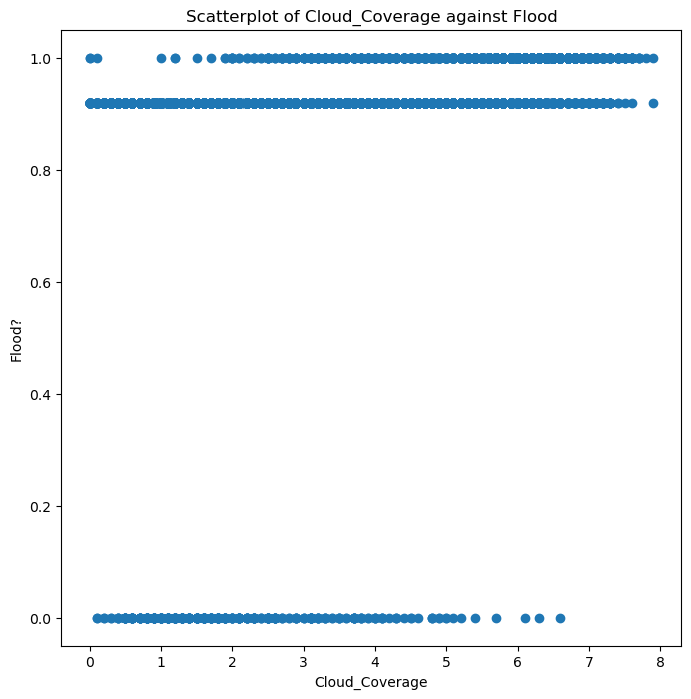

In [175]:
plt.figure(figsize = (8,8))
plt.scatter(x = 'Cloud_Coverage', y = 'Flood?', data = data)
# scatter plot with pyplot
plt.xlabel('Cloud_Coverage')
plt.ylabel('Flood?')
plt.title('Scatterplot of Cloud_Coverage against Flood');

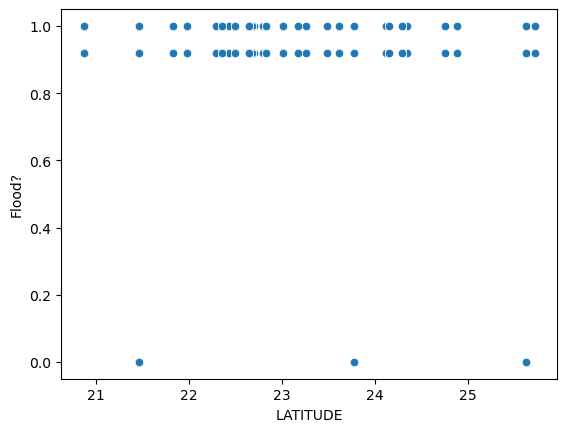

In [176]:
sns.scatterplot(x = 'LATITUDE', y = 'Flood?', data = data);

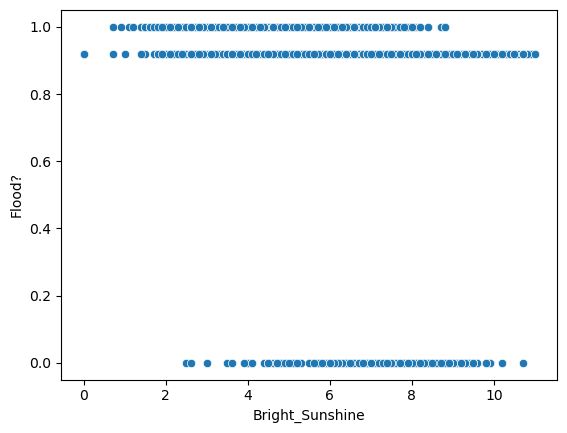

In [177]:
sns.scatterplot(x = 'Bright_Sunshine', y = 'Flood?', data = data);

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
data.head()

Sl  Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0   0              0  1949      1      29.4      12.3       0.0   
1   1              0  1949      2      33.9      15.2       9.0   
2   2              0  1949      3      36.7      20.2       8.0   
3   3              0  1949      4      33.9      23.9     140.0   
4   4              0  1949      5      35.6      25.0     217.0   

   Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0               68.0    0.453704             0.6         7.831915   
1               63.0    0.659259             0.9         8.314894   
2               59.0    1.085185             1.5         8.131915   
3               71.0    1.772222             3.9         8.219149   
4               76.0    1.703704             4.1         7.046809   

   Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
0           41950  536809.8  510151.9      22.7      90.36    4  1949.01   
1           41950  536809.8  510151.9      22.7      90.36    4  1949.02   
2           41950  536809.8  510151.9      22.7      90.36    4  1949.03   
3           41950  536809.8  510151.9      22.7      90.36    4  1949.04   
4           41950  536809.8  510151.9      22.7      90.36    4  1949.05   

     Flood?  
0  0.919653  
1  0.919653  
2  0.919653  
3  0.919653  
4  0.919653

<Axes: xlabel='Flood?', ylabel='Density'>

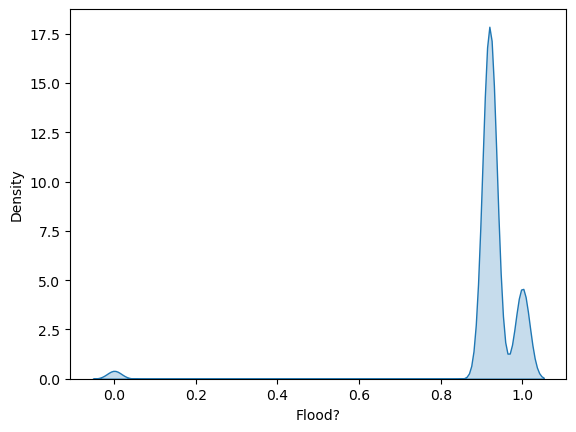

In [179]:
sns.kdeplot(x = "Flood?", data = data, fill = True)

<Axes: xlabel='Flood?', ylabel='Density'>

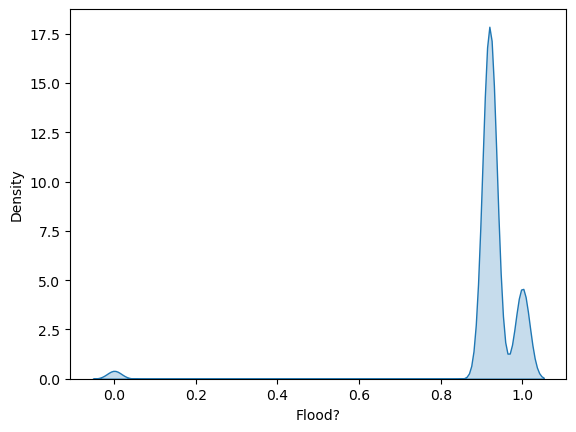

In [180]:
sns.kdeplot(x = "Flood?", data = data, fill = True)

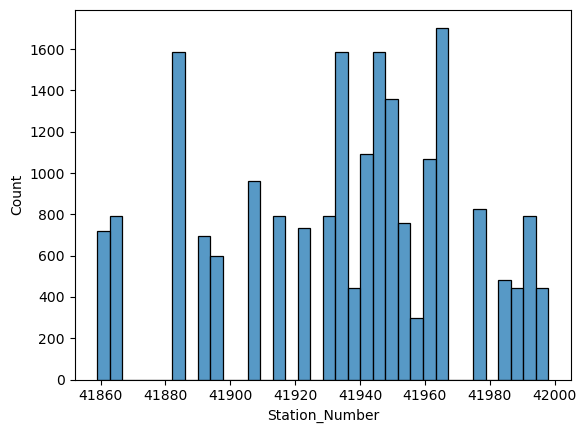

In [181]:
sns.histplot(x = "Station_Number", data = data);

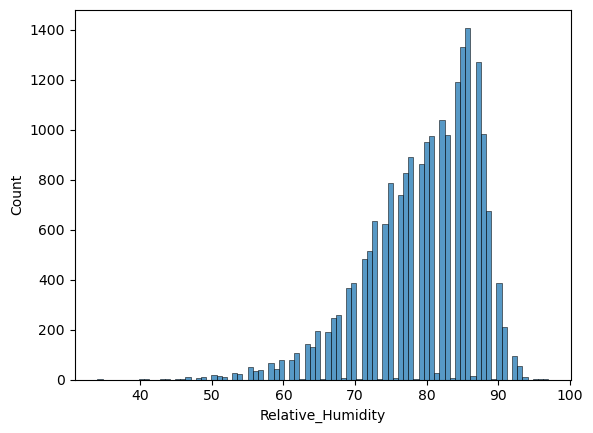

In [182]:
sns.histplot(x = "Relative_Humidity", data = data);

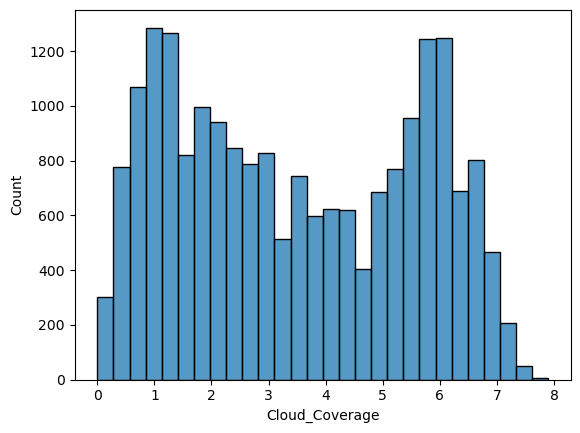

In [183]:
sns.histplot(x = "Cloud_Coverage", data = data);

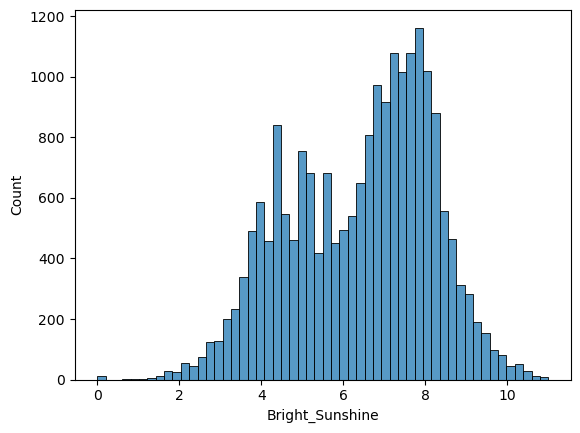

In [184]:
sns.histplot(x = "Bright_Sunshine", data = data);

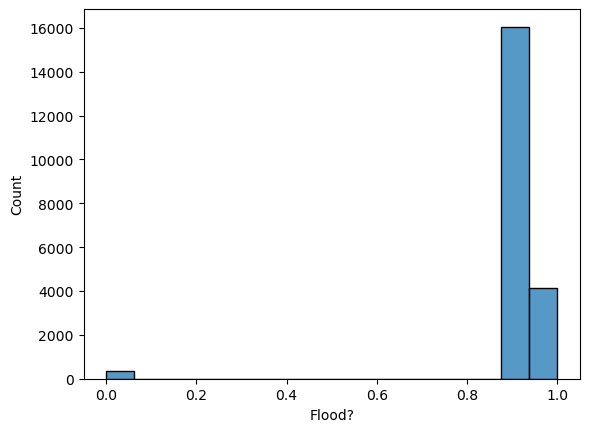

In [185]:
sns.histplot(x = "Flood?", data = data);

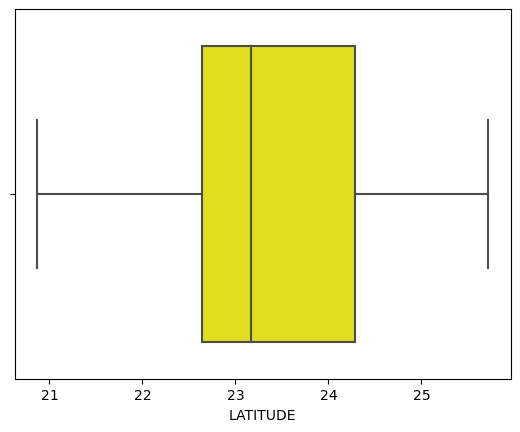

In [186]:
import random
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'LATITUDE', data = data, color = random.choice(colorlist)); # horizontal box plot

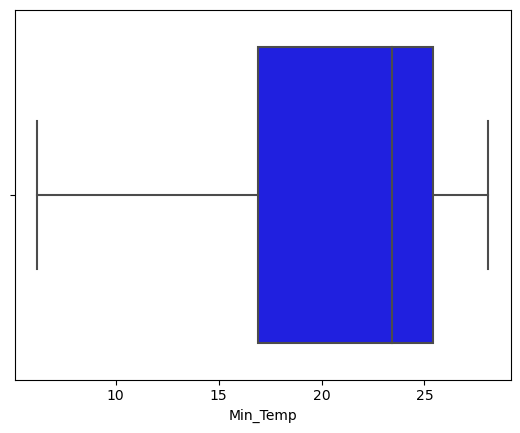

In [187]:
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'Min_Temp', data = data, color = random.choice(colorlist)); # horizontal box plot

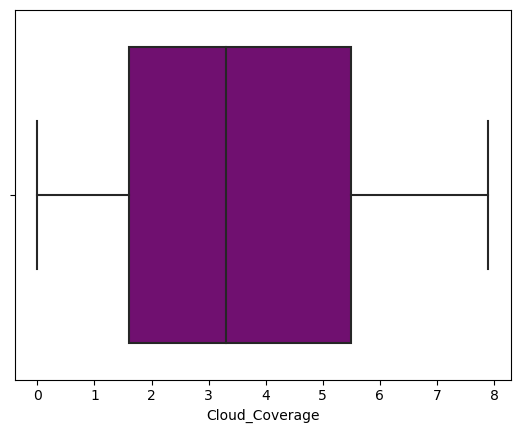

In [188]:
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'Cloud_Coverage', data = data, color = random.choice(colorlist)); # horizontal box plot

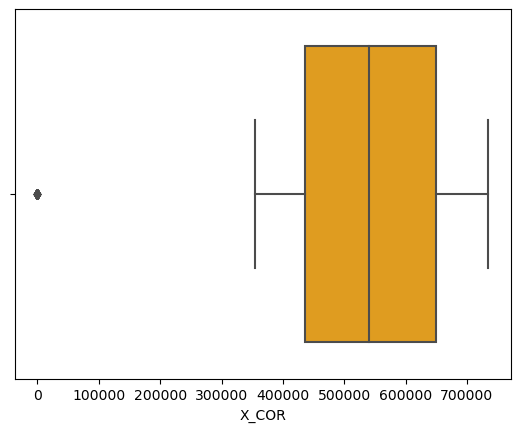

In [189]:
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'X_COR', data = data, color = random.choice(colorlist)); # horizontal box plot

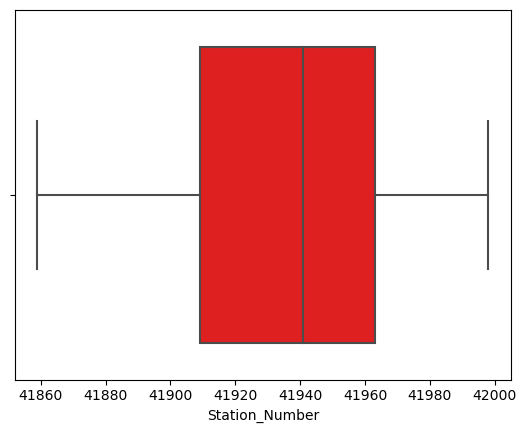

In [190]:
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'Station_Number', data = data, color = random.choice(colorlist)); # horizontal box plot

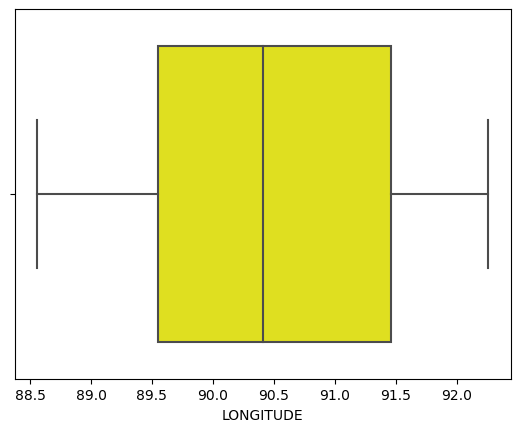

In [191]:
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'LONGITUDE', data = data, color = random.choice(colorlist)); # horizontal box plot

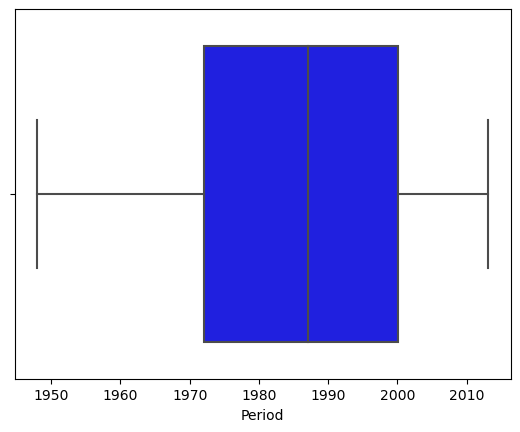

In [192]:
colorlist = ['red', 'yellow', 'orange', 'purple', 'blue']
sns.boxplot(x = 'Period', data = data, color = random.choice(colorlist)); # horizontal box plot

In [193]:
correlation_matrix = data.corr()

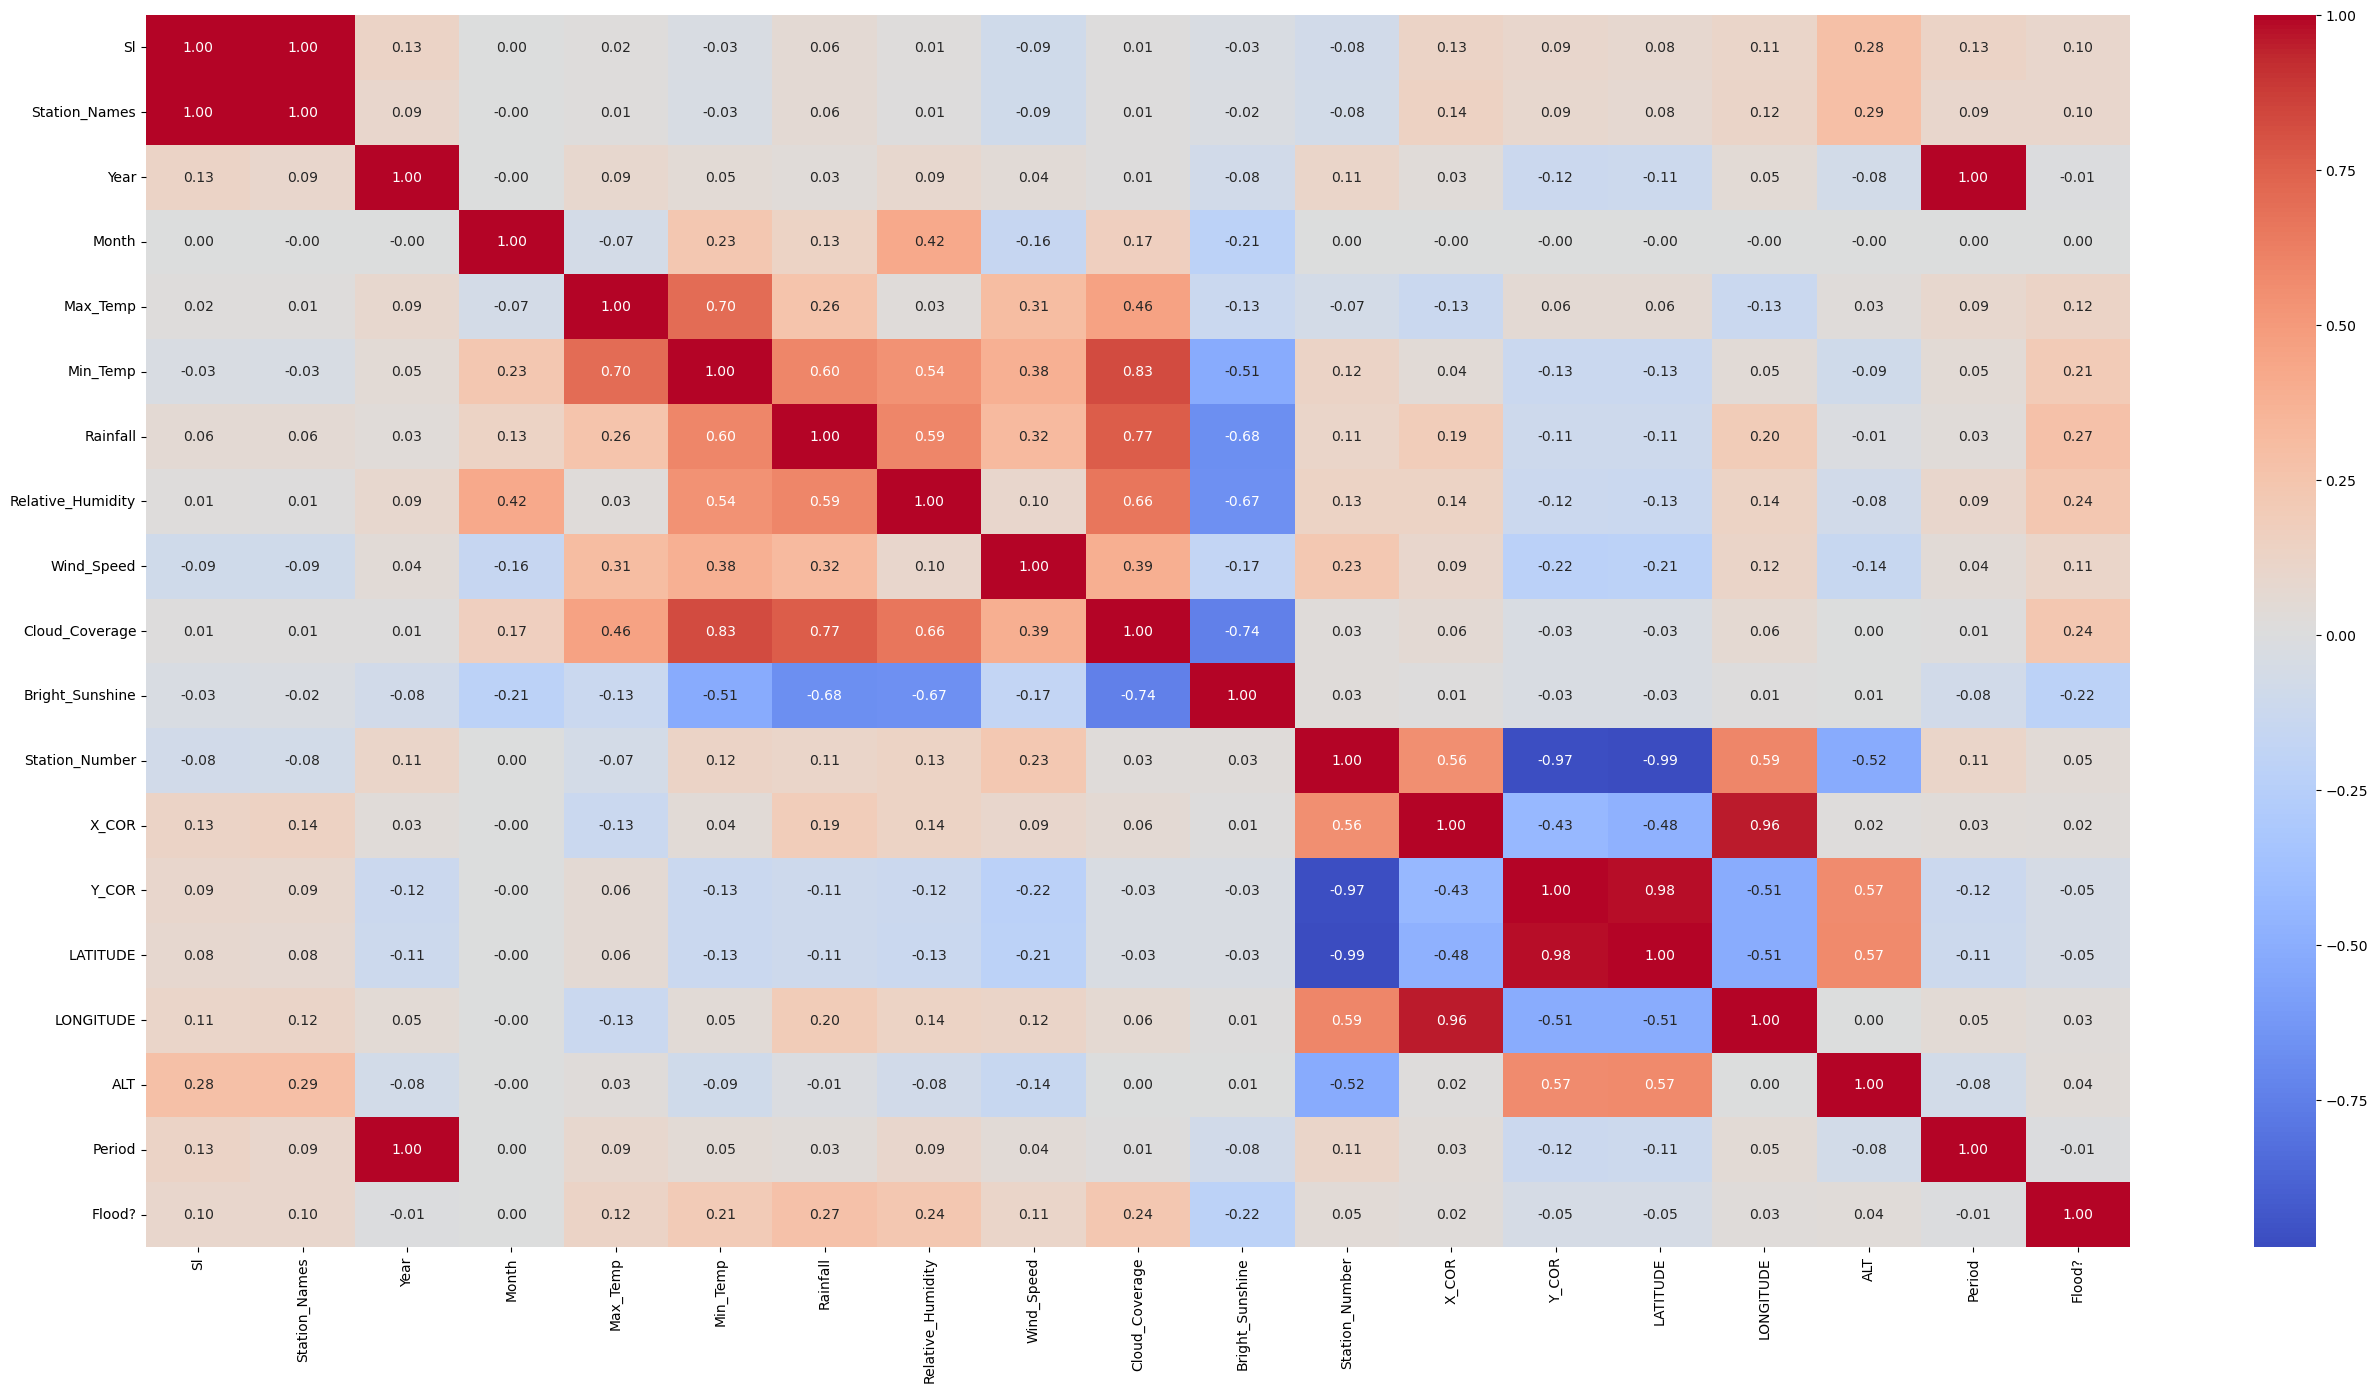

In [194]:
plt.figure(figsize=(32, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [195]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0        0.919653
1        0.919653
2        0.919653
3        0.919653
4        0.919653
           ...   
20539    1.000000
20540    0.919653
20541    0.919653
20542    0.919653
20543    0.919653
Name: Flood?, Length: 20544, dtype: float64

In [196]:
x=data.iloc[:,2:11]
x.head()

Year  Month  Max_Temp  Min_Temp  Rainfall  Relative_Humidity  Wind_Speed  \
0  1949      1      29.4      12.3       0.0               68.0    0.453704   
1  1949      2      33.9      15.2       9.0               63.0    0.659259   
2  1949      3      36.7      20.2       8.0               59.0    1.085185   
3  1949      4      33.9      23.9     140.0               71.0    1.772222   
4  1949      5      35.6      25.0     217.0               76.0    1.703704   

   Cloud_Coverage  Bright_Sunshine  
0             0.6         7.831915  
1             0.9         8.314894  
2             1.5         8.131915  
3             3.9         8.219149  
4             4.1         7.046809

In [197]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.01538462, 0.        , 0.34821429, ..., 0.04050926, 0.07594937,
        0.71199226],
       [0.01538462, 0.09090909, 0.54910714, ..., 0.05886243, 0.11392405,
        0.75589942],
       [0.01538462, 0.18181818, 0.67410714, ..., 0.09689153, 0.18987342,
        0.73926499],
       ...,
       [1.        , 0.81818182, 0.51339286, ..., 0.22321429, 0.55696203,
        0.50909091],
       [1.        , 0.90909091, 0.48660714, ..., 0.1875    , 0.21518987,
        0.76363636],
       [1.        , 1.        , 0.37053571, ..., 0.26785714, 0.11392405,
        0.73636364]])

In [198]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.head()

Year  Month   Max_Temp   Min_Temp  Rainfall  Relative_Humidity  \
2346   1980      7  32.300000  25.800000     426.0               86.0   
3232   1985      5  33.800000  23.800000     511.0               79.0   
13390  1964     11  30.600000  19.400000       0.0               76.0   
2756   2009      9  34.866667  25.533333     422.0               85.0   
1273   2007      2  30.700000  16.500000      80.0               80.0   

       Wind_Speed  Cloud_Coverage  Bright_Sunshine  
2346     1.400000             5.3         3.300000  
3232     5.100000             4.1         6.300000  
13390    0.300000             1.5         7.522857  
2756     3.233333             5.7         6.411131  
1273     0.400000             2.0         6.300000

In [199]:
x_train.dtypes

Year                   int64
Month                  int64
Max_Temp             float64
Min_Temp             float64
Rainfall             float64
Relative_Humidity    float64
Wind_Speed           float64
Cloud_Coverage       float64
Bright_Sunshine      float64
dtype: object

In [200]:
x_test.head()

Year  Month  Max_Temp  Min_Temp  Rainfall  Relative_Humidity  \
3209   1983      6      35.0      25.0     621.0           81.00000   
6977   1972      6      36.1      24.6     246.0           84.00000   
3274   1988     11      32.5      21.1      72.0           77.00000   
12839  2009     12      28.6      15.7       0.0           81.00000   
782    1966      3      32.9      20.6      44.0           77.06383   

       Wind_Speed  Cloud_Coverage  Bright_Sunshine  
3209          5.2             6.1         4.200000  
6977          1.6             5.8         5.000000  
3274          1.6             3.0         6.900000  
12839         0.0             0.4         6.300000  
782           1.0             2.0         6.781818

In [201]:
# type casting.
y_train=y_train.astype('int')
y_train

2346     1
3232     1
13390    0
2756     1
1273     0
        ..
2566     0
13135    1
17678    0
5542     0
20016    0
Name: Flood?, Length: 15408, dtype: int32

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [203]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)

In [204]:
knn_default = KNeighborsClassifier()

In [205]:
knn_default.fit(x_train, y_train)

KNeighborsClassifier()

In [206]:
y_test=y_test.astype('int')
y_test

3209     1
6977     0
3274     0
12839    0
782      0
        ..
4362     0
6040     1
18671    0
12641    1
15015    0
Name: Flood?, Length: 5136, dtype: int32

In [207]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=knn_default.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 0, 0, ..., 0, 1, 0])

In [208]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
3209     1
6977     0
3274     0
12839    0
782      0
        ..
4362     0
6040     1
18671    0
12641    1
15015    0
Name: Flood?, Length: 5136, dtype: int32


In [209]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 0 0 ... 0 1 0]


In [210]:
y_pred_default = knn_default.predict(x_test)

In [211]:
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy without hyperparameters:", accuracy_default)

Accuracy without hyperparameters: 0.9413940809968847


In [212]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_pred_default)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred_default)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred_default)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:94.139408
Recall Score:84.549763
ROC score:90.584119
[[3943  138]
 [ 163  892]]


In [213]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [214]:
param_grid = {'n_neighbors': np.arange(1, 21)}

In [215]:
knn = KNeighborsClassifier()

In [216]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [217]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 20}
Best Score: 0.9430165964555108


In [218]:
best_knn = grid_search.best_estimator_

In [219]:
y_pred_tuned = best_knn.predict(x_test)

In [220]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy with hyperparameter tuning:", accuracy_tuned)

Accuracy with hyperparameter tuning: 0.9447040498442367


In [221]:
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_pred_tuned)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred_tuned)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred_tuned)*100))
print(confusion_matrix(y_test,y_pred_tuned))


Accuracy Score:94.470405
Recall Score:83.412322
ROC score:90.370704
[[3972  109]
 [ 175  880]]


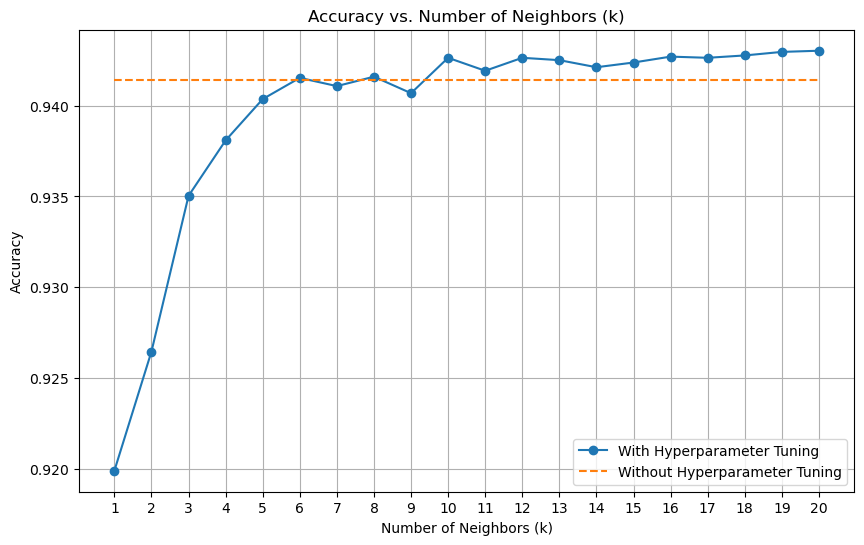

In [222]:
# Plotting the accuracy for kNN classifier without hyperparameter tuning
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 21), grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', label='With Hyperparameter Tuning')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21))
plt.grid(True)

# Plotting the accuracy for kNN classifier with hyperparameter tuning
plt.plot(np.arange(1, 21), [accuracy_default]*20, linestyle='--', label='Without Hyperparameter Tuning')

plt.legend()
plt.show()

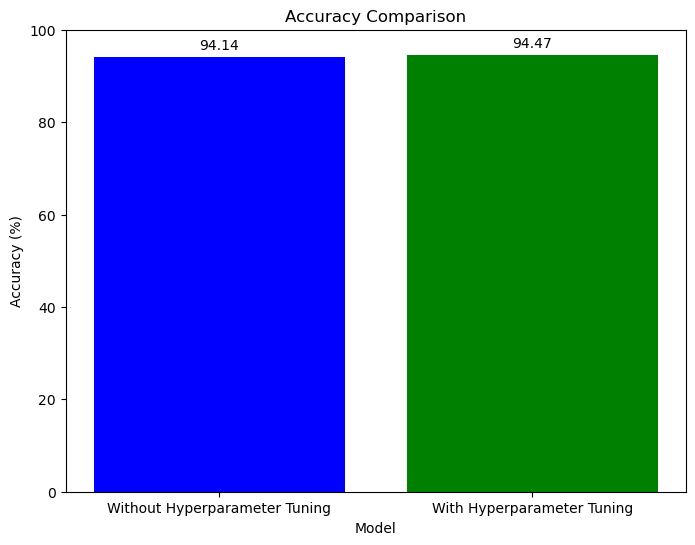

In [223]:
# Define accuracy values for both scenarios
accuracy_values = [accuracy_default * 100, accuracy_tuned * 100]
labels = ['Without Hyperparameter Tuning', 'With Hyperparameter Tuning']

# Plotting the accuracy for both scenarios using a bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
log_reg_default = LogisticRegression()

In [226]:
log_reg_default.fit(x_train, y_train)

LogisticRegression()

In [227]:
y_pred_default = log_reg_default.predict(x_test)

In [228]:
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy without hyperparameter tuning:", accuracy_default)

Accuracy without hyperparameter tuning: 0.9445093457943925


In [229]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred_default)*100))
print("recall score:%f"%(recall_score(y_test,y_pred_default)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred_default)*100))
print(confusion_matrix(y_test,y_pred_default))


accuracy score:94.450935
recall score:84.644550
roc score:90.815291
[[3958  123]
 [ 162  893]]


In [230]:
# Define the parameter grid to search
param_grid = {'C': np.logspace(-3, 3, 100,1000)}

In [231]:
# Create Logistic Regression classifier
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

In [232]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])})

In [233]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.0013219411484660286}
Best Score: 0.9447691477837938


In [234]:
# Get the best model
best_lr = grid_search.best_estimator_

In [235]:
# Make predictions using the best model
y_train_pred = best_lr.predict(x_train)
y_test_pred = best_lr.predict(x_test)

In [236]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [237]:
print("Best accuracy on training set:", train_accuracy)
print("Best accuracy on testing set:", test_accuracy)

Best accuracy on training set: 0.9445742471443406
Best accuracy on testing set: 0.944898753894081


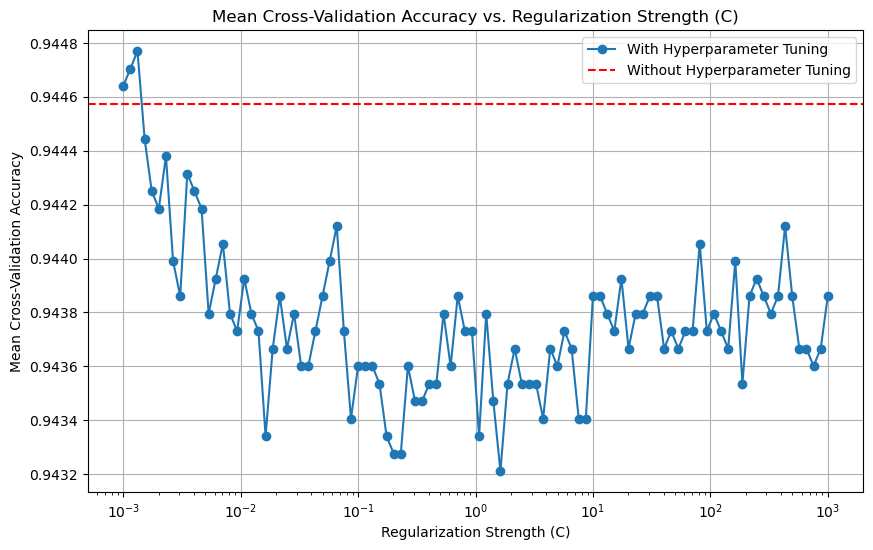

In [238]:
# Plotting the accuracy curve for logistic regression models with and without hyperparameter tuning
plt.figure(figsize=(10, 6))

# Plotting the accuracy curve for logistic regression without hyperparameter tuning
plt.semilogx(param_grid['C'], grid_search.cv_results_['mean_test_score'], label='With Hyperparameter Tuning', marker='o', linestyle='-')

# Plotting the accuracy curve for logistic regression with hyperparameter tuning
plt.axhline(y=train_accuracy, color='red', linestyle='--', label='Without Hyperparameter Tuning')

plt.title('Mean Cross-Validation Accuracy vs. Regularization Strength (C)')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [239]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_test_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_test_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_test_pred)*100))
print(confusion_matrix(y_test,y_test_pred))


accuracy score:94.489875
recall score:84.549763
roc score:90.804654
[[3961  120]
 [ 163  892]]


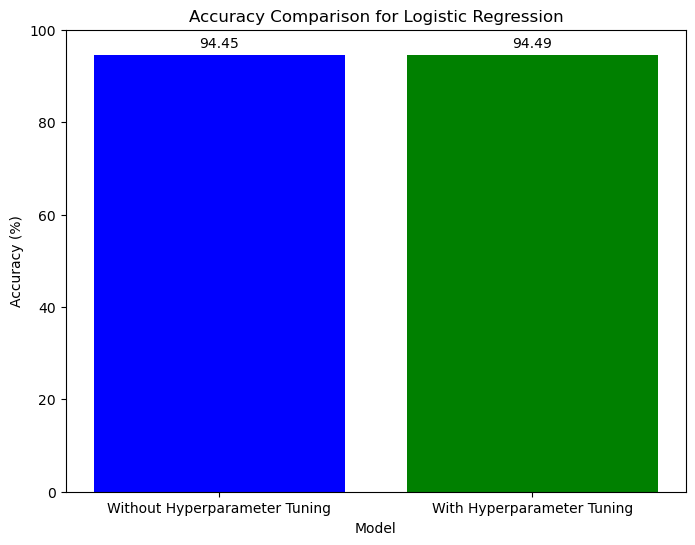

In [240]:
# Plotting the comparison between logistic regression models with and without hyperparameter tuning
plt.figure(figsize=(8, 6))
accuracy_values = [accuracy_default * 100, test_accuracy * 100]
labels = ['Without Hyperparameter Tuning', 'With Hyperparameter Tuning']
plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.title('Accuracy Comparison for Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [241]:
from sklearn.svm import SVC

In [242]:
from sklearn.model_selection import cross_val_score

In [243]:
svc_default = SVC()

In [244]:
# Train the classifier
svc_default.fit(x_train, y_train)

SVC()

In [245]:
# Make predictions
y_pred_default = svc_default.predict(x_test)

In [246]:
# Calculate accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy without hyperparameter tuning:", accuracy_default)

Accuracy without hyperparameter tuning: 0.9437305295950156


In [247]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred_default)*100))
print("recall score:%f"%(recall_score(y_test,y_pred_default)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred_default)*100))
print(confusion_matrix(y_test,y_pred_default))


accuracy score:94.373053
recall score:83.507109
roc score:90.344586
[[3966  115]
 [ 174  881]]


In [248]:
param_grid = {'C': [0.1, 1, 10, 100]}

In [249]:
svc = SVC()

In [250]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [251]:
# Get the best model
best_svc = grid_search.best_estimator_

In [252]:
y_pred_tuned = best_svc.predict(x_test)

In [253]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy with hyperparameter tuning:", accuracy_tuned)

Accuracy with hyperparameter tuning: 0.9454828660436138


In [254]:
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_pred_tuned)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred_tuned)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred_tuned)*100))
print(confusion_matrix(y_test,y_pred_tuned))


Accuracy Score:94.548287
Recall Score:82.748815
ROC score:90.173721
[[3983   98]
 [ 182  873]]


In [255]:

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [256]:
print("Best parameters:", best_params)

Best parameters: {'C': 100}


In [257]:
# Define a range of values for the hyperparameter C
C_range = [0.1, 1, 10, 100]

In [258]:
# Initialize lists to store mean accuracies for both scenarios
mean_accuracies_default = []
mean_accuracies_tuned = []

In [259]:
for C_value in C_range:
    # Without hyperparameter tuning
    svc_default = SVC(C=C_value)
    accuracies_default = cross_val_score(svc_default, x_train, y_train, cv=5)
    mean_accuracies_default.append(np.mean(accuracies_default))

    # With hyperparameter tuning
    svc_tuned = SVC(C=C_value)
    grid_search = GridSearchCV(svc_tuned, param_grid={'C': [C_value]}, cv=5)
    grid_search.fit(x_train, y_train)
    best_svc = grid_search.best_estimator_
    accuracies_tuned = cross_val_score(best_svc, x_train, y_train, cv=5)
    mean_accuracies_tuned.append(np.mean(accuracies_tuned))

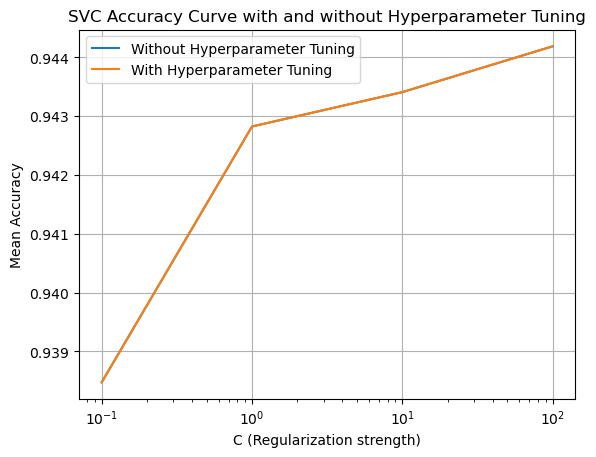

In [260]:
# Plot the accuracy curves for both scenarios
plt.plot(C_range, mean_accuracies_default, label='Without Hyperparameter Tuning')
plt.plot(C_range, mean_accuracies_tuned, label='With Hyperparameter Tuning')
plt.title('SVC Accuracy Curve with and without Hyperparameter Tuning')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Mean Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization if C values are wide-ranging
plt.legend()
plt.grid(True)
plt.show()

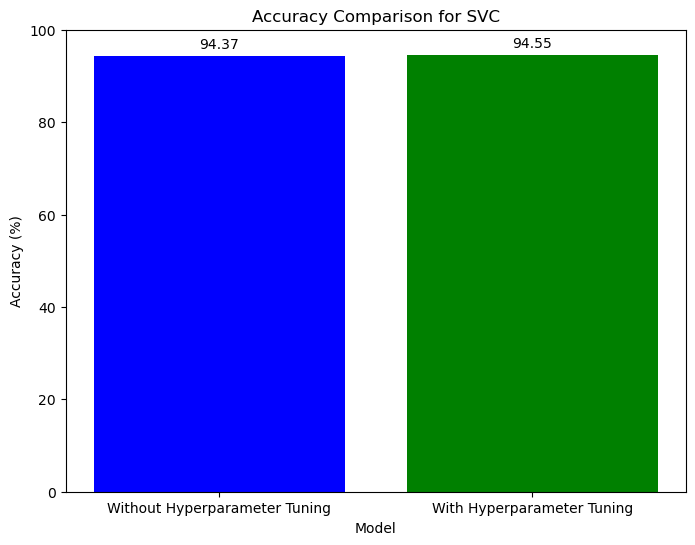

In [261]:
# Define the accuracy values for SVC models with and without hyperparameter tuning
accuracy_values_svc = [accuracy_default * 100, accuracy_tuned * 100]

# Labels for the bars
labels_svc = ['Without Hyperparameter Tuning', 'With Hyperparameter Tuning']

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(labels_svc, accuracy_values_svc, color=['blue', 'green'])
plt.title('Accuracy Comparison for SVC')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(accuracy_values_svc):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
rf_default = RandomForestClassifier()

In [264]:
# Train the classifier
rf_default.fit(x_train, y_train)

RandomForestClassifier()

In [265]:
y_pred_default = rf_default.predict(x_test)

In [266]:
# Calculate accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy without hyperparameter tuning:", accuracy_default)

Accuracy without hyperparameter tuning: 0.9503504672897196


In [267]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred_default)*100))
print("recall score:%f"%(recall_score(y_test,y_pred_default)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred_default)*100))
print(confusion_matrix(y_test,y_pred_default))


accuracy score:95.035047
recall score:84.644550
roc score:91.182848
[[3988   93]
 [ 162  893]]


In [268]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [269]:
rf_classifier_tuned = RandomForestClassifier(random_state=42)

In [270]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [271]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.9504154853352726


In [272]:
# Make predictions on the test set using the best model
best_rf_classifier = grid_search.best_estimator_
y_pred_tuned = best_rf_classifier.predict(x_test)

In [273]:
print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Best parameters: {'C': 100}
Best cross-validation accuracy: 0.9441848586962314


In [274]:
# Calculate accuracy
accuracy_with_tuning = accuracy_score(y_test, y_pred_tuned)
print("Accuracy with hyperparameter tuning:", accuracy_with_tuning)

Accuracy with hyperparameter tuning: 0.952297507788162


In [275]:
print("\nAccuracy Score:%f"%(accuracy_score(y_test, y_pred_tuned)*100))
print("Recall Score:%f"%(recall_score(y_test, y_pred_tuned)*100))
print("ROC score:%f"%(roc_auc_score(y_test, y_pred_tuned)*100))
print(confusion_matrix(y_test, y_pred_tuned))


Accuracy Score:95.229751
Recall Score:85.592417
ROC score:91.656782
[[3988   93]
 [ 152  903]]


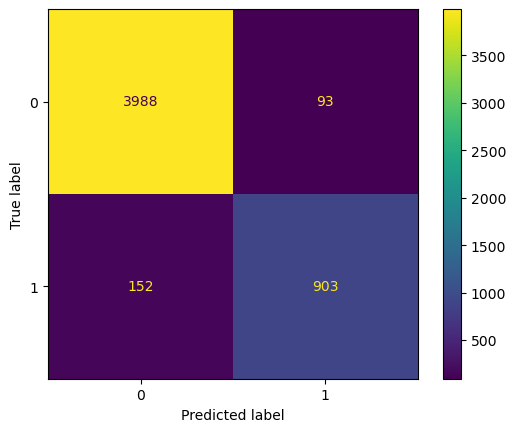

In [276]:
# Generate predictions with the best model
y_pred_tuned = best_rf_classifier.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

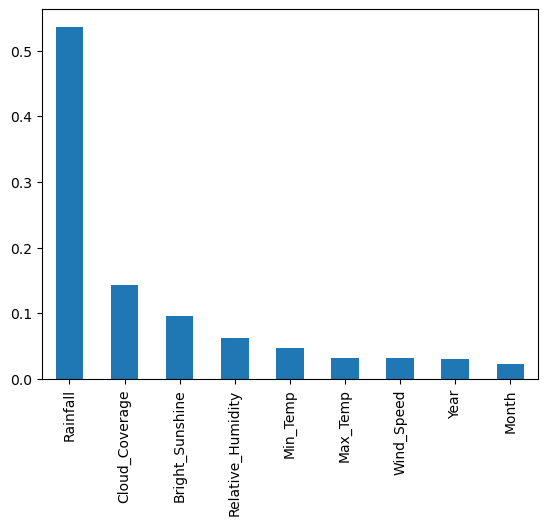

In [277]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf_classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

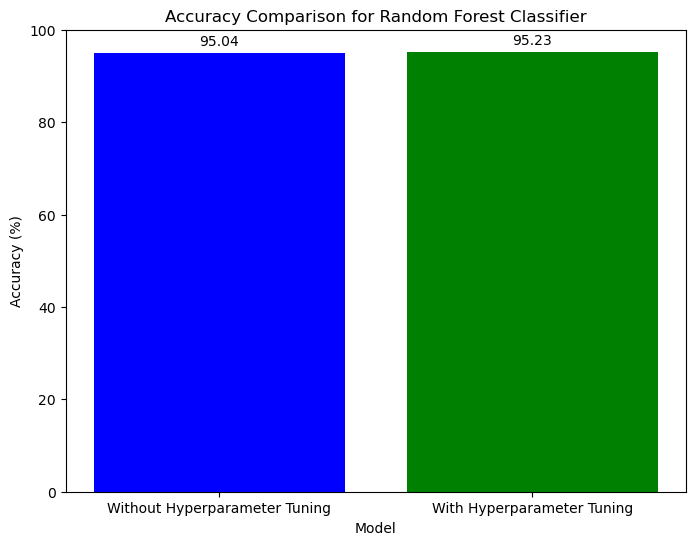

In [278]:
import matplotlib.pyplot as plt

# Define accuracy values for Random Forest Classifier with and without hyperparameter tuning
accuracy_values_rf = [accuracy_default * 100, accuracy_with_tuning * 100]  # Changed accuracy_tuned to accuracy_with_tuning

# Labels for the bars
labels_rf = ['Without Hyperparameter Tuning', 'With Hyperparameter Tuning']

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(labels_rf, accuracy_values_rf, color=['blue', 'green'])
plt.title('Accuracy Comparison for Random Forest Classifier')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(accuracy_values_rf):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()


In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
dt_default = DecisionTreeClassifier()

In [300]:
# Train the classifier
dt_default.fit(x_train, y_train)

DecisionTreeClassifier()

In [301]:
# Make predictions
y_pred_default = dt_default.predict(x_test)

In [302]:
# Calculate accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy without hyperparameter tuning:", accuracy_default)

Accuracy without hyperparameter tuning: 0.9228971962616822


In [303]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred_default)*100))
print("recall score:%f"%(recall_score(y_test,y_pred_default)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred_default)*100))
print(confusion_matrix(y_test,y_pred_default))


accuracy score:92.289720
recall score:82.085308
roc score:88.506511
[[3874  207]
 [ 189  866]]


In [304]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [305]:
# Instantiate the Decision Tree classifier
dt_classifier_tuned = DecisionTreeClassifier(random_state=42)

In [306]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [307]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9376948499111487


In [308]:
# Make predictions on the test set using the best model
best_dt_classifier = grid_search.best_estimator_
y_pred_tuned = best_dt_classifier.predict(x_test)

In [309]:
# Calculate accuracy
accuracy_with_tuning = accuracy_score(y_test, y_pred_tuned)
print("Accuracy with hyperparameter tuning:", accuracy_with_tuning)

Accuracy with hyperparameter tuning: 0.9421728971962616


In [310]:
print("\nAccuracy Score:%f"%(accuracy_score(y_test, y_pred_tuned)*100))
print("Recall Score:%f"%(recall_score(y_test, y_pred_tuned)*100))
print("ROC score:%f"%(roc_auc_score(y_test, y_pred_tuned)*100))
print(confusion_matrix(y_test, y_pred_tuned))


Accuracy Score:94.217290
Recall Score:83.127962
ROC score:90.106005
[[3962  119]
 [ 178  877]]


In [311]:
# Instantiate the Decision Tree classifier without hyperparameter tuning
accuracies_default = cross_val_score(dt_default, x_train, y_train, cv=5)
mean_accuracies_default.append(np.mean(accuracies_default))

In [312]:
# Grid search with cross-validation for hyperparameter tuning
best_dt = grid_search.best_estimator_
accuracies_tuned = cross_val_score(best_dt, x_train, y_train, cv=5)
mean_accuracies_tuned.append(np.mean(accuracies_tuned))

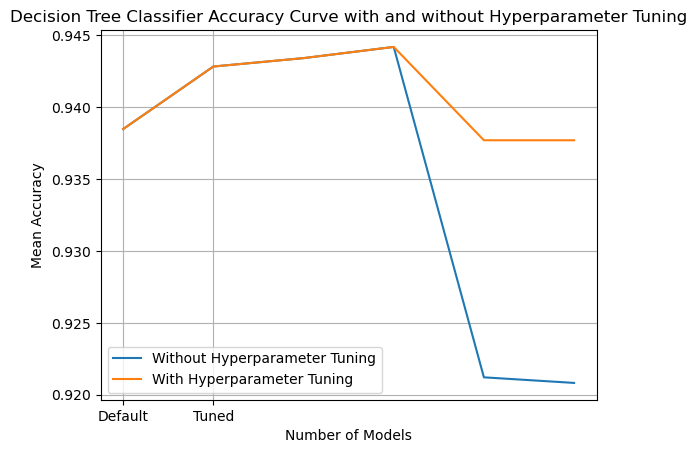

In [313]:
# Plot the accuracy curves for both scenarios
plt.plot(np.arange(len(mean_accuracies_default)), mean_accuracies_default, label='Without Hyperparameter Tuning')
plt.plot(np.arange(len(mean_accuracies_tuned)), mean_accuracies_tuned, label='With Hyperparameter Tuning')
plt.title('Decision Tree Classifier Accuracy Curve with and without Hyperparameter Tuning')
plt.xlabel('Number of Models')
plt.ylabel('Mean Accuracy')
plt.xticks([0, 1], ['Default', 'Tuned'])
plt.legend()
plt.grid(True)
plt.show()

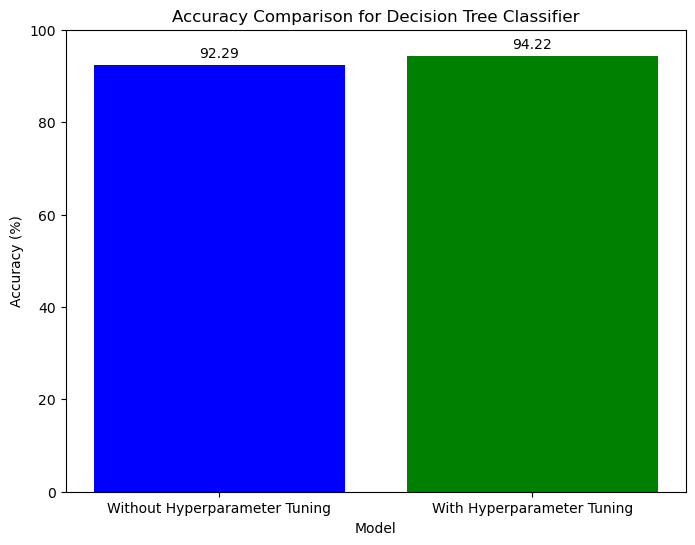

In [314]:
# Define accuracy values for Decision Tree Classifier with and without hyperparameter tuning
accuracy_values_dt = [accuracy_default * 100, accuracy_with_tuning * 100]  # Using accuracy values from the Decision Tree Classifier

# Labels for the bars
labels_dt = ['Without Hyperparameter Tuning', 'With Hyperparameter Tuning']

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(labels_dt, accuracy_values_dt, color=['blue', 'green'])
plt.title('Accuracy Comparison for Decision Tree Classifier')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(accuracy_values_dt):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [327]:
import lime
import lime.lime_tabular

In [328]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [329]:
# Make predictions on the test set
y_pred = clf.predict(x_test)

In [330]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9511292834890965


In [331]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, 
                                                   feature_names=x_train.columns.values.tolist(),
                                                   class_names=['No Flood', 'Flood'], 
                                                   verbose=True, 
                                                   mode='classification')

In [332]:
# Choose a sample for explanation
sample_idx = 0
sample = x_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Explain the prediction
exp = explainer.explain_instance(sample.values, clf.predict_proba, num_features=len(x_train.columns))
exp.show_in_notebook(show_table=True)

C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.04950753206362285
Prediction_local [0.70476912]
Right: 0.86


In [333]:
# Choose the 14th instance for prediction
sample_idx = 13  # Note that Python uses 0-based indexing, so the 5th instance corresponds to index 4
sample = x_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Predict the result for the 5th instance
prediction = clf.predict_proba([sample.values])[0]

# Print the prediction probabilities
print("Prediction Probabilities:")
for i, prob in enumerate(prediction):
    print(f"Class {i}: {prob}")

# Explain the prediction using LIME
exp = explainer.explain_instance(sample.values, clf.predict_proba, num_features=len(x_train.columns))
exp.show_in_notebook(show_table=True)

C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction Probabilities:
Class 0: 0.01
Class 1: 0.99
Intercept 0.040816277720778144
Prediction_local [0.73364007]
Right: 0.99


In [335]:
# Choose the 16th instance for prediction
sample_idx = 15  # Note that Python uses 0-based indexing, so the 10th instance corresponds to index 9
sample = x_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Predict the result for the 10th instance
prediction = clf.predict_proba([sample.values])[0]

# Print the prediction probabilities
print("Prediction Probabilities:")
for i, prob in enumerate(prediction):
    print(f"Class {i}: {prob}")

# Explain the prediction using LIME
exp = explainer.explain_instance(sample.values, clf.predict_proba, num_features=len(x_train.columns))
exp.show_in_notebook(show_table=True)


C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction Probabilities:
Class 0: 0.87
Class 1: 0.13
Intercept 0.03869214861005152
Prediction_local [0.73608049]
Right: 0.13


In [336]:
exp.as_list()

[('Rainfall > 309.00', 0.5795963797426702),
 ('Cloud_Coverage > 5.50', 0.06626285081914046),
 ('Relative_Humidity > 85.00', 0.027691672802108467),
 ('Year > 2000.00', 0.012507511222401436),
 ('Min_Temp > 25.40', 0.007451806981187834),
 ('Wind_Speed > 1.90', -0.005773433925952084),
 ('7.00 < Month <= 10.00', 0.00485622311056375),
 ('5.00 < Bright_Sunshine <= 6.80', 0.002829227082701831),
 ('31.70 < Max_Temp <= 33.90', 0.0019661033877466485)]

In [337]:
# Choose the 20th instance for prediction
sample_idx = 19  # Note that Python uses 0-based indexing, so the 10th instance corresponds to index 9
sample = x_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Predict the result for the 10th instance
prediction = clf.predict_proba([sample.values])[0]

# Print the prediction probabilities
print("Prediction Probabilities:")
for i, prob in enumerate(prediction):
    print(f"Class {i}: {prob}")

# Explain the prediction using LIME
exp = explainer.explain_instance(sample.values, clf.predict_proba, num_features=len(x_train.columns))
exp.show_in_notebook(show_table=True)

C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction Probabilities:
Class 0: 1.0
Class 1: 0.0
Intercept 0.2855425857927392
Prediction_local [0.01590176]
Right: 0.0


In [338]:
# Choose the 30th instance for prediction
sample_idx = 29  # Note that Python uses 0-based indexing, so the 10th instance corresponds to index 9
sample = x_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Predict the result for the 10th instance
prediction = clf.predict_proba([sample.values])[0]

# Print the prediction probabilities
print("Prediction Probabilities:")
for i, prob in enumerate(prediction):
    print(f"Class {i}: {prob}")

# Explain the prediction using LIME
exp = explainer.explain_instance(sample.values, clf.predict_proba, num_features=len(x_train.columns))
exp.show_in_notebook(show_table=True)

C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mokarrom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction Probabilities:
Class 0: 0.99
Class 1: 0.01
Intercept 0.22808952745335334
Prediction_local [0.18335524]
Right: 0.01
